Dataset:
    Number of TV Ads (x)  Number of Cars Sold (y)
0                     1                       14
1                     3                       24
2                     2                       18
3                     1                       17
4                     3                       27

Linear Model: y = 10.00 + 5.00 * x
Intercept: 10.0
Slope: 5.0

Prediction for 10 TV ads: 60.00 cars sold


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


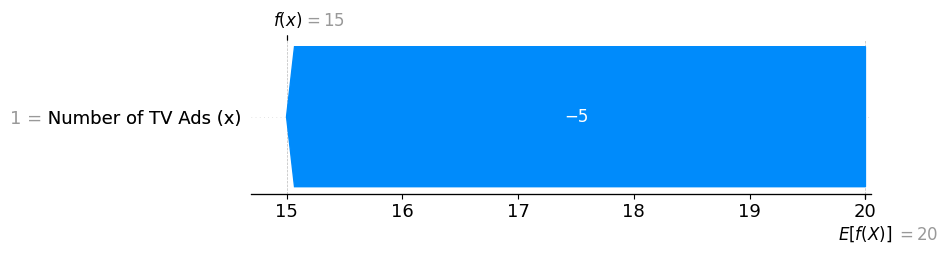


SHAP values for each instance:
[[-5.]
 [ 5.]
 [ 0.]
 [-5.]
 [ 5.]]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
from sklearn.linear_model import LinearRegression

df = pd.read_excel('/content/Car_Sales.xlsx')
print("Dataset:\n", df)
X = df[['Number of TV Ads (x)']]
y = df['Number of Cars Sold (y)']
model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_
print(f"\nLinear Model: y = {intercept:.2f} + {slope:.2f} * x")
print("Intercept:", intercept)
print("Slope:", slope)

prediction = model.predict([[10]])
print(f"\nPrediction for 10 TV ads: {prediction[0]:.2f} cars sold")
explainer = shap.Explainer(model.predict, X)
shap_values = explainer(X)
shap.plots.waterfall(shap_values[0])
shap.plots.force(shap_values)
print("\nSHAP values for each instance:")
print(shap_values.values)

Linear Model: Salary = 25792.20 + 9449.96 * YearsExperience
Intercept: 25792.200198668696
Slope: 9449.962321455076
Predicted Salary for 3.5 years: ₹58,867.07
Predicted Salary for 7 years: ₹91,941.94


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


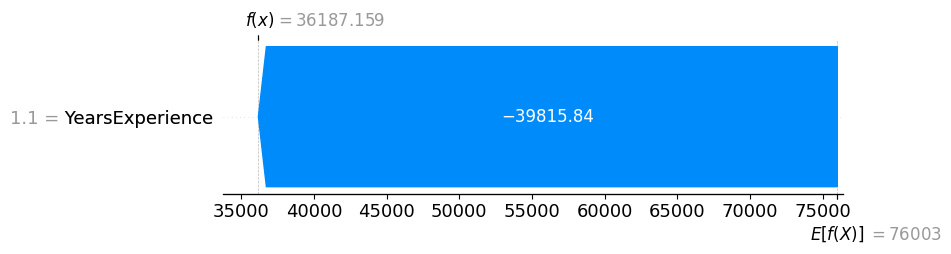

In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import shap
df = pd.read_csv('/content/Experience_Salary.csv')
X = df[['YearsExperience']]
y = df['Salary']
model = LinearRegression()
model.fit(X, y)

intercept = model.intercept_
slope = model.coef_[0]

print(f"Linear Model: Salary = {intercept:.2f} + {slope:.2f} * YearsExperience")
print("Intercept:", intercept)
print("Slope:", slope)
pred_3_5 = model.predict([[3.5]])
pred_7 = model.predict([[7]])

print(f"Predicted Salary for 3.5 years: ₹{pred_3_5[0]:,.2f}")
print(f"Predicted Salary for 7 years: ₹{pred_7[0]:,.2f}")
explainer = shap.Explainer(model.predict, X)
shap_values = explainer(X)
shap.plots.waterfall(shap_values[0])
shap.plots.force(shap_values)

Model: y = 20.00 + (0.50 * IQ) + (0.50 * Study Hours)
Intercept: 20.000000000000014
IQ Coefficient: 0.4999999999999998
Study Hours Coefficient: 0.5000000000000002
Predicted Test Score for IQ=95 & Study Hours=25: 80.00


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


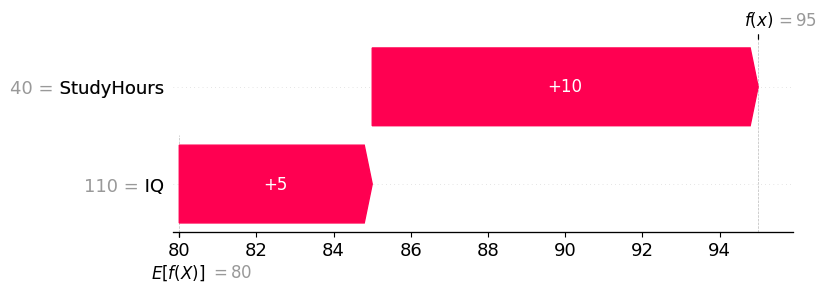

In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import shap
df = pd.read_excel('/content/StudyHour.xlsx')
df.columns = df.columns.str.strip()
X = df[['IQ', 'StudyHours']]
y = df['TestScore']
model = LinearRegression()
model.fit(X, y)
print(f"Model: y = {model.intercept_:.2f} + ({model.coef_[0]:.2f} * IQ) + ({model.coef_[1]:.2f} * Study Hours)")
print("Intercept:", model.intercept_)
print("IQ Coefficient:", model.coef_[0])
print("Study Hours Coefficient:", model.coef_[1])
pred = model.predict([[95, 25]])
print(f"Predicted Test Score for IQ=95 & Study Hours=25: {pred[0]:.2f}")
explainer = shap.Explainer(model.predict, X)
shap_values = explainer(X)
shap.plots.waterfall(shap_values[0])
shap.plots.force(shap_values)


📈 Linear Regression Model:
Sales = 11.00 + (0.20 * Facebook) + (0.01 * Newspaper)

🧮 Predicted Sales (in $1000s):
For Facebook=50, Newspaper=70 → 21.44
For Facebook=25, Newspaper=30 → 16.18


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(



🔎 SHAP Waterfall Plot for First Prediction


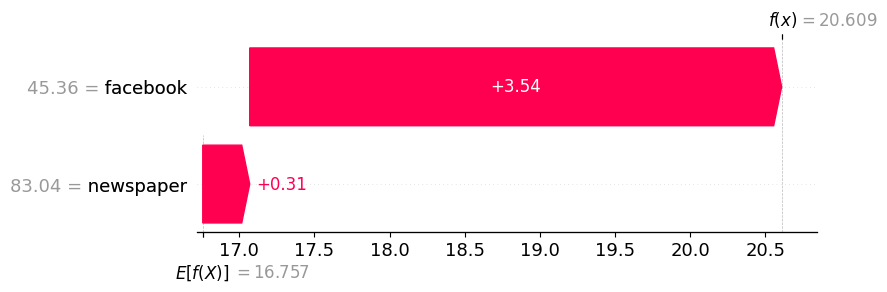


🔎 SHAP Force Plot for First Prediction

🔎 SHAP Beeswarm Plot (Feature Importance)


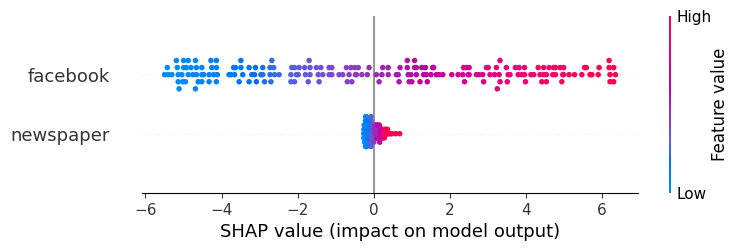


✅ SHAP values exported to: /content/shap_contributions.csv


In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import shap
import matplotlib.pyplot as plt
df = pd.read_excel('/content/Marketing_Dataset.xlsx')
df.columns = df.columns.str.strip()
required_cols = ['facebook', 'newspaper', 'sales']
if not all(col in df.columns for col in required_cols):
    raise ValueError(f"Missing one or more required columns: {required_cols}")
df = df[required_cols].dropna()
X = df[['facebook', 'newspaper']]
y = df['sales']

model = LinearRegression()
model.fit(X, y)
intercept = model.intercept_
coef_fb, coef_news = model.coef_
print(f"\n📈 Linear Regression Model:")
print(f"Sales = {intercept:.2f} + ({coef_fb:.2f} * Facebook) + ({coef_news:.2f} * Newspaper)")
pred1 = model.predict([[50, 70]])[0]
pred2 = model.predict([[25, 30]])[0]

print(f"\n🧮 Predicted Sales (in $1000s):")
print(f"For Facebook=50, Newspaper=70 → {pred1:.2f}")
print(f"For Facebook=25, Newspaper=30 → {pred2:.2f}")
explainer = shap.Explainer(model.predict, X)
shap_values = explainer(X)
shap.initjs()
print("\n🔎 SHAP Waterfall Plot for First Prediction")
shap.plots.waterfall(shap_values[0])
print("\n🔎 SHAP Force Plot for First Prediction")
shap.plots.force(shap_values[0])
print("\n🔎 SHAP Beeswarm Plot (Feature Importance)")
shap.plots.beeswarm(shap_values)
shap_df = pd.DataFrame(shap_values.values, columns=X.columns)
shap_df['Prediction'] = model.predict(X)
shap_df = pd.concat([X.reset_index(drop=True), shap_df], axis=1)

shap_df.to_csv('/content/shap_contributions.csv', index=False)
print("\n✅ SHAP values exported to: /content/shap_contributions.csv")